# Mooring Synthesis of Initial NC data (offline)

## 24BS-2A

- from netcdf files
- plot all depths of each parameter on each other for comparative purposes
- Temperature, Salinity, Pressure in this notebook.  See companion for Oxygen, Chlor, ADCP/currents, etc

In [1]:
import xarray as xa
import pandas as pd
import numpy as np
import datetime
import cmocean

In [2]:
#wrap the plot in image settings for visual appeal
# may be able to make this cleaner or just a preset
%run '../../../settings/mpl_plot_settings.py'

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


In [5]:
ncfiles = '/Users/bell/ecoraid/2023/Moorings/23bs2c/final_data_cf/*eco*.nc'
ncfiles_2 = '/Users/bell/ecoraid/2024/Moorings/24bspr2a/final_data_cf/*eco*.nc'
# ncfiles_2 = '*.nc'
mfd = xa.open_mfdataset(ncfiles, chunks=None,)
mfd_2 = xa.open_mfdataset(ncfiles_2, chunks=None)


In [6]:
mfd

<xarray.Dataset>
Dimensions:             (time: 9042, depth: 3, latitude: 1, longitude: 1)
Coordinates:
  * time                (time) datetime64[ns] 2023-08-29 ... 2024-09-08T17:00:00
  * latitude            (latitude) float64 56.86
  * longitude           (longitude) float64 -164.1
  * depth               (depth) float64 12.0 23.0 45.0
Data variables:
    chlor_fluorescence  (time, depth, latitude, longitude) float64 dask.array<chunksize=(9042, 1, 1, 1), meta=np.ndarray>
Attributes: (12/15)
    Latitude_DegMMddW:                      56 51.630 N
    Longitude_DegMMddN:                     164 03.290 W
    MooringID:                              23BS-2C
    platform_deployment_date:               2023-08-29T00:00:00Z
    platform_deployment_cruise_name:        AQ2301
    platform_recovery_date:                 2024-09-08T17:00:00Z
    ...                                     ...
    InstrumentSerialNumber:                 027
    InstrumentType:                         Eco-Fluorometer FLS
    date_created:                           2024-09-17T12:51:05Z
    date_modified:                          2024-10-16 12:52:34.182446
    QC_indicator:                           ProbablyGood
    history:                                Trimmed to deployment.\nTrimmed t...

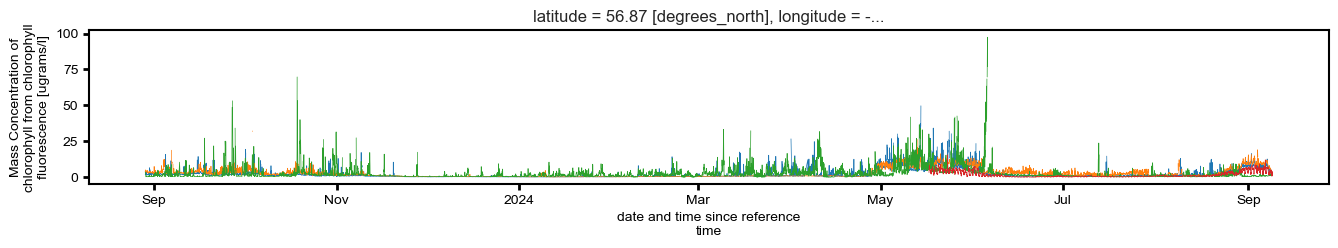

In [7]:
fig, ax = plt.subplots(1,figsize=(16, 2))
for depth in mfd.isel({'latitude':0,'longitude':0}).depth:
    mfd.isel({'latitude':0,'longitude':0}).sel({'depth':depth}).chlor_fluorescence.plot(x="time",hue="depth",ax=ax,linewidth=.5)

for depth in mfd_2.isel({'latitude':0,'longitude':0}).depth:
    mfd_2.isel({'latitude':0,'longitude':0}).sel({'depth':depth}).chlor_fluorescence.plot(x="time",hue="depth",ax=ax,linewidth=.5)

(72.0, -5.0)

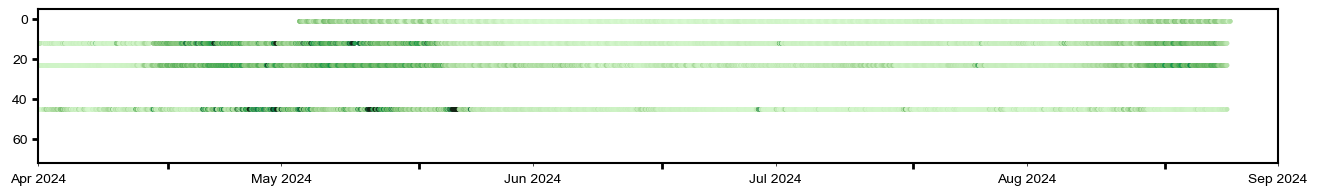

In [10]:
fig, ax = plt.subplots(1,figsize=(16, 2))
for depth in mfd.isel({'latitude':0,'longitude':0}).depth:
    temp = mfd.isel({'latitude':0,'longitude':0}).sel({'depth':depth})
    ax.scatter(temp["time"],
               np.ones_like(temp["chlor_fluorescence"].values)*temp["depth"].values,
               c=temp["chlor_fluorescence"],cmap=cmocean.cm.algae,s=5,vmin=0,vmax=30)

for depth in mfd_2.isel({'latitude':0,'longitude':0}).depth:
    temp = mfd_2.isel({'latitude':0,'longitude':0}).sel({'depth':depth})
    ax.scatter(temp["time"],
               np.ones_like(temp["chlor_fluorescence"].values)*temp["depth"].values,
               c=temp["chlor_fluorescence"],cmap=cmocean.cm.algae,s=5,vmin=0,vmax=30)

# ax.set_ylim([50,0])
ax.set_xlim([datetime.date(2024,4,15),datetime.date(2024,9,15)])

ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)
# ax.invert_yaxis()
ax.set_ylim([72,-5])

##Prawler

In [11]:
prawler = pd.read_csv('/Users/bell/ecoraid/2024/Moorings/24bspr2a/rawconverted/praw/24BSPR-2A_preliminary_Prawler.csv',parse_dates=True,index_col='time (UTC)')

(72.0, -5.0)

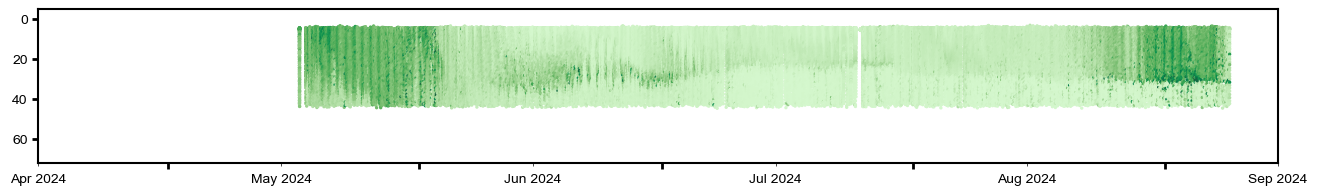

In [15]:
upper_temp = 30
lower_temp = 0

fig, ax = plt.subplots(1,figsize=(16, 2))
# mfd.chlor_fluorescence.T.plot(ax=ax,vmin=lower_temp,vmax=upper_temp,cmap=cmocean.cm.algae)

ax.scatter(prawler.index,prawler['SB_Depth'],c=prawler['wetlab_Chlorophyll_ug/l'],
           s=2,cmap=cmocean.cm.algae,vmin=lower_temp,vmax=upper_temp)
            
ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b %Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

ax.set_xlim([datetime.date(2024,4,15),datetime.date(2024,9,15)])
ax.set_ylim([72,-5])